In [23]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [38]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from os import path
!dir code


 Volume in drive C is OS
 Volume Serial Number is 5E5B-021C

 Directory of C:\Shahar\BarIlan\NLP-courses\89687-DL\Assignment3\code

12/16/2018  15:22 PM    <DIR>          .
12/16/2018  15:22 PM    <DIR>          ..
12/16/2018  15:13 PM        90,536,006 .._379396.dy.data
12/16/2018  15:13 PM               411 .._379396.dy.meta
12/16/2018  14:20 PM         1,614,733 .._trainwords.pickle
12/16/2018  15:18 PM               704 best_accuracies.txt
12/11/2018  16:36 PM             3,708 bilstm-example.py
12/16/2018  11:52 AM             2,143 bilstmPredict.py
12/16/2018  13:10 PM             9,494 bilstmTrain.py
12/16/2018  13:12 PM            10,270 bilstmTrain.pyc
12/10/2018  17:01 PM             4,030 dev
12/11/2018  09:38 AM             2,398 dev1
12/11/2018  14:07 PM             8,252 dev2
12/11/2018  14:09 PM            12,292 dev3
12/11/2018  14:17 PM            19,887 dev4
12/16/2018  15:22 PM             2,553 even_dev
12/16/2018  15:22 PM            25,469 even_train
12/16/2018  1

In [7]:
import json

In [51]:
all_runs = []
with open('code/report.json', 'rt') as a:
    for line in a:
        try:
            run = json.loads(line.strip())
        except:
            pass
        all_runs.append(run)

In [52]:
my_pos_runs = {run[0].get('run_id'): run 
               for run in all_runs 
               if run[0].get('run_id') in {'379396', '805363', '362814', '368291'}}
my_ner_runs = {run[0].get('run_id'): run for run in all_runs if run[0].get('run_id') in {'885114', '16121', '16187', '20908'}}

run_codes = {
    '379396': 'a',
    '805363': 'b',
    '362814': 'c',
    '368291': 'd',
    '885114': 'a',
    '16121': 'b', 
    '16187': 'c', 
    '20908': 'd'
}


pos: sentences 37832 words 902139
ner: sentences 14987 words 204567


In [60]:
ner_x_y = {run_codes[k]: [(t['cycles'], t['dev_accuracy_except_common']) 
                          for t in v[1:]] for k, v in my_ner_runs.items()}

pos_x_y = {run_codes[k]: [(t['cycles'], t['dev_accuracy']) 
                          for t in v[1:]] for k, v in my_pos_runs.items()}

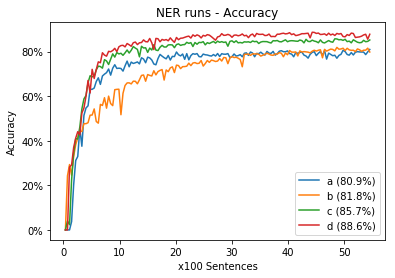

In [50]:
# ner
import matplotlib as mpl
ax = plt.subplot(111)
for k in ['a','b','c','d']:
    x, y = zip(*ner_x_y[k])
    x= np.array(x)*(14987/204567)*0.01
    y = np.array(y) 
    plt.plot(x,y)
plt.xlabel('x100 Sentences')
plt.ylabel('Accuracy')
plt.legend(['a (80.9%)','b (81.8%)','c (85.7%)','d (88.6%)'])
plt.title('NER runs - Accuracy')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.0%}'))

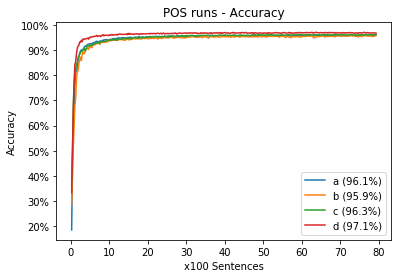

In [64]:
# pos
import matplotlib as mpl
ax = plt.subplot(111)
for k in ['a','b','c','d']:
    x, y = zip(*pos_x_y[k])
    x= np.array(x)*(37832/902139)*0.01
    y = np.array(y) 
    plt.plot(x,y)
plt.xlabel('x100 Sentences')
plt.ylabel('Accuracy')
plt.legend(['a (96.1%)','b (95.9%)','c (96.3%)','d (97.1%)'])
plt.title('POS runs - Accuracy')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.0%}'))

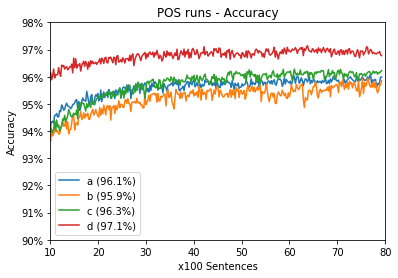

In [65]:
# pos
import matplotlib as mpl
ax = plt.subplot(111)
for k in ['a','b','c','d']:
    x, y = zip(*pos_x_y[k])
    x= np.array(x)*(37832/902139)*0.01
    y = np.array(y) 
    plt.plot(x,y)
plt.xlabel('x100 Sentences')
plt.ylabel('Accuracy')
plt.legend(['a (96.1%)','b (95.9%)','c (96.3%)','d (97.1%)'])
plt.title('POS runs - Accuracy')
ax.set_xlim([10,80])
ax.set_ylim([0.9,.98])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.0%}'))

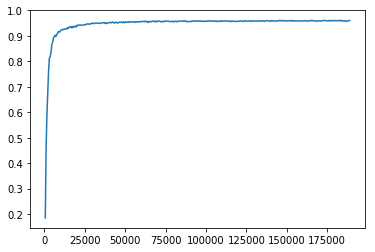

In [22]:
plt.plot(x,y)